# Simulando Probabilidades

A História de uma moeda de três faces

A simulação a seguir se trata da atividade da disciplina de Estatística Exploratória e visa explorar, tal como, simular probabilidades para a obtenção da distribuição de frequência média de resultados. Dessa forma, iremos simular diversos jogos e seus respectivos resultados, visando observar a probabilidade de um jogador ganhar

## Gerador Pseudoaleatório

Infelizmente, [computadores não são aleatórios](https://pt.stackoverflow.com/questions/9026/como-%C3%A9-gerada-a-randomiza%C3%A7%C3%A3o-pelo-computador) e se faz necessário simular valores pseudoaleatórios. Aqui, vamos utilizar um módulo de pseudo-randomização da linguagem python que utiliza uma série de transformações, mas que possui uma semente baseada na hora. 

Para todos os jogos iremos utilizar uma função sorteio, do qual consideremos um dado com 6 faces, onde o intervalo de números por cada face pode ser representado pelo intervalo `[1,2,3,4,5,6]` e a possibilidade de cada face cair é a mesma.

In [1]:
import random as r

def get_raffle_number() -> int:
    return r.randrange(1,7) # [1,6]

### Jogo para 1 dado

Também precisamos definir uma função jogo, do qual iremos considerar 3 jogadores e o número de simulações, nesse caso seria a quantidade de jogos que serão efetuados. Essa função será utilizada para obter os resultados de cada jogo e montar uma lista com a distribuição de frequência em que cada jogador ganha um jogo.

In [2]:
import itertools as it

def raffle_1D(p1: list, p2: list, p3: list, simulations: int) -> list:
    results = [0, 0, 0]
    for _ in range(simulations):
        dice = get_raffle_number()
        for n1, n2, n3 in it.zip_longest(p1, p2, p3):
            if n1 == dice: results[0] += 1
            if n2 == dice: results[1] += 1
            if n3 == dice: results[2] += 1

    return results

### Jogo para 2 dados

Há jogos em que serão necessário 2 dados, logo vamos também montar uma função para um jogo de 2 dados. Essa função também será utilizada para obter os resultados de cada jogo e montar uma lista com a distribuição de frequência em que cada jogador poderá ganhar o jogo.

In [3]:
import itertools as it

def raffle_2D(p1: list, p2: list, p3: list, simulations: int) -> list:
    results = [0,0,0]
    for _ in range(simulations):
        dice1 = get_raffle_number()
        dice2 = get_raffle_number()
        for n1, n2, n3 in it.zip_longest(p1, p2, p3):
            if n1 != None and (n1[0] == dice1) and (n1[1] == dice2): 
                results[0] += 1
            if n2 != None and (n2[0] == dice1) and (n2[1] == dice2): 
                results[1] += 1
            if n3 != None and (n3[0] == dice1) and (n3[1] == dice2): 
                results[2] += 1
        
    return results

## Visualização dos dados

Para visualizar a distribuições de dados, vamos utilizar `matplotlib` e `numpy` para montar um gráfico de frequência simples e mostrar os pesos de cada simulação.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def draw_it(results: list):
    players = ["Jogador 1", "Jogador 2", "Jogador 3"]
    labels = ["Resultados"]
    data = np.array(results)
    data_cum = data.cumsum()
    category_colors = plt.colormaps['tab10'](
        np.linspace(0.15, 0.85, data.shape[0]))

    fig, ax = plt.subplots(figsize=(10, 1))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data).max())

    for i, (colname, color) in enumerate(zip(players, category_colors)):
        widths = data[i]
        starts = data_cum[i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(players), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    plt.show()
    

## Jogo 1: Três jogadores com mesma probabilidade de vitória

Vamos mostrar que nesse caso, a distribuição de resultados será igual para as 3 partes e que em teoria um jogador terá `2/6` de chances que corresponde a cerca de `33,33..%` de chances de ganhar o jogo.

In [5]:
player1 = [1,2]
player2 = [3,4]
player3 = [5,6]

SIMULATIONS = 1000

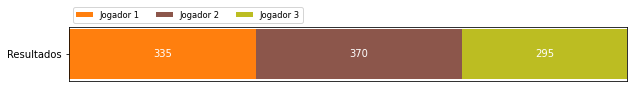

In [6]:
results = raffle_1D(player1, player2, player3, SIMULATIONS)
draw_it(results)

## Jogo 2: Três Jogadores probabilidades diferentes

Neste caso, os jogadores possuem probabilidades diferentes.

In [7]:
player1 = [1]
player2 = [2, 3]
player3 = [4, 5, 6]

SIMULATIONS = 1000

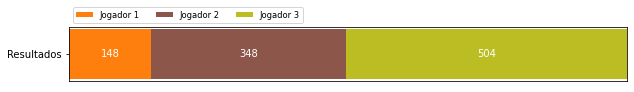

In [8]:
results = raffle_1D(player1, player2, player3, SIMULATIONS)
draw_it(results)

## Jogo 3: Três Jogadores com probabilidades diferentes

In [9]:
player1 = [1]
player2 = [2]
player3 = [3, 4, 5, 6]

SIMULATIONS = 1000

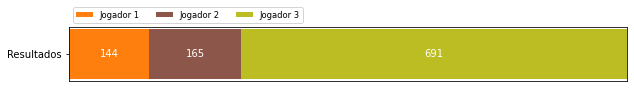

In [10]:
results = raffle_1D(player1, player2, player3, SIMULATIONS)
draw_it(results)

## Jogo 4: Três Jogadores com probabilidade iguais e dois dados

In [11]:
player1 = [
    (1,1), (1,2), (1,3), (1,4), (1,5), (1,6),
    (2,1), (2,2), (3,1), (4,1), (5,1), (6,1)
]
player2 = [
    (2,3), (3,2), (3,3), (3,4), (3,5), (3,6),
    (2,4), (4,2), (4,3), (4,4), (5,3), (6,3)
]
player3 = [
    (2,5), (5,2), (4,5), (5,4), (5,5), (5,6),
    (2,6), (6,2), (4,6), (6,4), (6,5), (6,6)
]

SIMULATIONS = 1000

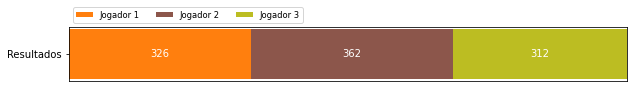

In [12]:
results = raffle_2D(player1, player2, player3, SIMULATIONS)
draw_it(results)

## Jogo 5: Três Jogadores com probabilidade diferentes e dois dados

In [13]:
player1 = [
    (1,1), (1,2),  
    (2,1), (2,2) 
]
player2 = [
    (1,3), (1,4), (3,1), (4,1),
    (2,3), (3,2), (3,3), (3,4),
    (2,4), (4,2), (4,3), (4,4)
]
player3 = [
    (1,5), (1,6), (5,1), (6,1), (3,5), (3,6), (5,3), (6,3),
    (2,5), (5,2), (4,5), (5,4), (5,5), (5,6),
    (2,6), (6,2), (4,6), (6,4), (6,5), (6,6)
]

SIMULATIONS = 1000

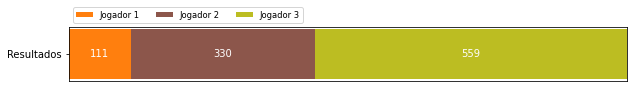

In [14]:
results = raffle_2D(player1, player2, player3, SIMULATIONS)
draw_it(results)